In [1]:
# Vamos importar as bibliotecas necessárias
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz

Em nosso experimento vamos utilizar o conjunto de dados "Pima Indians Diabetes Database". O objetivo do conjunto de dados é prever diagnosticamente se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade, entre outras.

Os dados podem ser baixados de https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
''' # Questao 1
col_names = ['A1', 'A2', 'A3', 'Classe']

# Importação
pima = pd.DataFrame()
pima['A1'] = [0, 0, 1, 0, 0] # a = 0 
pima['A2'] = [1, 1, 1, 0, 0] # v = 1
pima['A3'] = [1, 0, 0, 1, 0] # sim = 1
pima['Classe'] = [1, 1, 0 , 1, 0]
pima
 '''

" # Questao 1\ncol_names = ['A1', 'A2', 'A3', 'Classe']\n\n# Importação\npima = pd.DataFrame()\npima['A1'] = [0, 0, 1, 0, 0] # a = 0 \npima['A2'] = [1, 1, 1, 0, 0] # v = 1\npima['A3'] = [1, 0, 0, 1, 0] # sim = 1\npima['Classe'] = [1, 1, 0 , 1, 0]\npima\n "

In [3]:
''' # Questao 2
col_names = ['A1', 'A2', 'A3', 'Classe']

# Importação
pima = pd.DataFrame()
pima['A1'] = [0, 1, 1, 0, 1, 0] # a = 0 
pima['A2'] = [1, 0, 2, 2, 1, 0] # v = 1
pima['A3'] = [1, 1, 1, 0, 0, 0] # v = 1

pima['Classe'] = [1, 1, 0, 0, 0, 1]

# Vamos separar as variáveis preditoras da variável label
feature_cols = ['A1', 'A2', 'A3']
X = pima[feature_cols]
y = pima['Classe']  '''

" # Questao 2\ncol_names = ['A1', 'A2', 'A3', 'Classe']\n\n# Importação\npima = pd.DataFrame()\npima['A1'] = [0, 1, 1, 0, 1, 0] # a = 0 \npima['A2'] = [1, 0, 2, 2, 1, 0] # v = 1\npima['A3'] = [1, 1, 1, 0, 0, 0] # v = 1\n\npima['Classe'] = [1, 1, 0, 0, 0, 1]\n\n# Vamos separar as variáveis preditoras da variável label\nfeature_cols = ['A1', 'A2', 'A3']\nX = pima[feature_cols]\ny = pima['Classe']  "

In [4]:
''' # Questao 3
col_names = ['A1', 'A2', 'Classe']

# Importação
pima = pd.DataFrame()
pima['A1'] = [0, 1, 0, 0, 1, 0] # a = 0 
pima['A2'] = [1, 0, 2, 1, 2, 0] # v = 1

pima['Classe'] = [0, 0, 1, 1, 2, 2]

# Vamos separar as variáveis preditoras da variável label
feature_cols = ['A1', 'A2']
X = pima[feature_cols]
y = pima['Classe'] '''

" # Questao 3\ncol_names = ['A1', 'A2', 'Classe']\n\n# Importação\npima = pd.DataFrame()\npima['A1'] = [0, 1, 0, 0, 1, 0] # a = 0 \npima['A2'] = [1, 0, 2, 1, 2, 0] # v = 1\n\npima['Classe'] = [0, 0, 1, 1, 2, 2]\n\n# Vamos separar as variáveis preditoras da variável label\nfeature_cols = ['A1', 'A2']\nX = pima[feature_cols]\ny = pima['Classe'] "

In [5]:
# Um pouco dos dados
pima

NameError: name 'pima' is not defined

In [ ]:
# Vamos separar nosso conjunto de dados em partições de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [ ]:
# Vamos treinar a nossa Árvore de Decisão

# Objeto de DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')

# Treinamento do classificador
model = clf.fit(X_train,y_train)

In [ ]:
# Vamos criar uma função para visualizar nossa árvore
def plot_tree(tree, plot_title):

  # Dados do gráfico
  graph_data = export_graphviz(tree,
                               feature_names=feature_cols,
                               class_names=['0','1'],
                               filled=True,
                               rounded=True,
                               out_file=None)
  # Gerando o gráfico
  graph = graphviz.Source(graph_data)
  graph.render(plot_title)

  return graph

In [ ]:
# Gerar o gráfico
model_graph = plot_tree(model,'Diabetes')
model_graph

IndexError: list index out of range

In [ ]:
# Vamos testar e avaliar nossa árvore de decisão no conjunto de teste

# Pega as predições
y_pred = model.predict(X_test)

# Acurácia das predições
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.0


In [ ]:
# Vamos otimizar nossa árvore, colocando uma profundidade máxima de 3 níveis (excluindo a raiz)
# Isso vai servir como uma poda

# Cria o objeto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=100)

# Treina o modelo
model.prune = clf.fit(X_train,y_train)

# Vamos testar o novo modelo nos mesmos dados de teste
y_pred = model.prune.predict(X_test)

best_depth = []
for i in range(1, 100):
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  model.prune = clf.fit(X_train,y_train)
  y_pred = model.prune.predict(X_test)
  best_depth.append(metrics.accuracy_score(y_test, y_pred))
print(best_depth)
print(f'Acurácia máxima: {max(best_depth)}\n Profundida: {best_depth.index(max(best_depth))}')

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Acurácia máxima: 1.0
 Profundida: 0


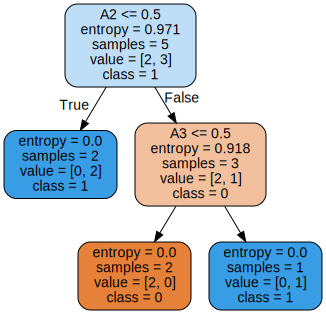

In [ ]:
# Vamos ver como ficou nossa árvore
model_graph = plot_tree(model.prune,'/home/fonta42/Desktop/IA/T8 - Arvore de Decisao/Diabetes.pruned')
model_graph

In [ ]:
# Vamos testar o novo modelo nos mesmos dados de teste
y_pred = model.prune.predict(X_test)

# Acurácia do novo modelo
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.0
